In [1]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy 
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas 
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
# numba
import numba
print('numba: {}'.format(numba.__version__))
# pyod
from pyod import version
print('pyod: {}'.format(version.__version__))

Python: 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
scipy: 1.2.1
numpy: 1.16.2
matplotlib: 3.0.3
pandas: 0.24.2
sklearn: 0.20.3
numba: 0.43.0
pyod: 0.6.8


In [2]:
# Load libraries
import numpy as np
from numpy.linalg import inv, det
import pandas as pd 

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import numpy as np
import time
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout
from tensorflow.python.keras.layers.recurrent import LSTM
from tensorflow.python.keras.models import Sequential
from numpy import arange, sin, pi, random

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle


#  USING ABOVE

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import seaborn as sns
from sklearn.model_selection import train_test_split

import scipy.stats as stats


from pyod.models.knn import KNN   # kNN detector
from pyod.utils.utility import standardizer


from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP
from pyod.utils.utility import standardizer
from pyod.utils.utility import precision_n_scores

import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
#0 = all messages are logged (default behavior)
#1 = INFO messages are not printed
#2 = INFO and WARNING messages are not printed
#3 = INFO, WARNING, and ERROR messages are not printed

In [3]:
# Load dataset
dfs = pd.read_csv(r'FinalProcessing_out.csv', header = 0)
#################################################
#scaler = MinMaxScaler(feature_range=(-1, 1))
#dfs = scaler.fit_transform(dfs)
################################################


#columns = np.full((corr.shape[0],), False, dtype=bool)
#corr = dfs.corr()
#selected_columns = dfs.columns[columns]
#columns[7] = True
#columns[0] = True
#columns[2] = True
#print(columns)
#print(selected_columns  )
#selected_columns = dfs.columns[columns]
#print(selected_columns  )
#dfs = dfs[selected_columns]
print("Number of observations:",len(dfs))
print("Number of normal transactions:",sum(dfs.cia==0))
print("Number of outliers:",sum(dfs.cia==1))
print("Ratio of outliers versus normal transaction:",sum(dfs.cia==1)/sum(dfs.cia==0))
dfs.head()

Number of observations: 6465
Number of normal transactions: 6225
Number of outliers: 240
Ratio of outliers versus normal transaction: 0.03855421686746988


,cia,_exit,capset,clock_gettime,close,connect,epoll_ctl,faccessat,fchmodat,fstatat64,...,pwrite64,renameat,rt_sigprocmask,rt_sigtimedwait,sendmsg,set_tid_address,setpriority,sigaction,sigaltstack,writev
0,0,0.0,0.0,14.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y = dfs.cia.astype(float)
dfs = dfs.drop(columns = ["cia"])#@@@.astype(float)
#dfs = dfs.drop(columns = ["timestamp"])#@@@.astype(float)

In [5]:
print(dfs.shape)
#print(dfs)

(6465, 36)


In [6]:
#################################################
#scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dfs = scaler.fit_transform(dfs)
################################################

In [7]:
from sklearn import preprocessing  
#Without type float gives a warning
x = dfs
#//CENTERING DATA
#x = preprocessing.scale(x, with_mean='True', with_std='False')

#y = dfs.cia#@@@.astype(float)
#print(y)
outliers_fraction = np.count_nonzero(y) / len(y)
outliers_percentage = round(outliers_fraction * 100, ndigits=4)

#print(outliers_fraction)
print("outliers_percentage: ",outliers_percentage,"%")


# Define nine outlier detection tools to be compared
#RandomState - train_test_split splits arrays or matrices into random train and test subsets. 
# That means that everytime you run it without specifying random_state, you will get a different result, this is expected behavior.
# On the other hand if you use random_state=some_number, then you can guarantee that the output of Run 1 will be equal to the output of Run 2,
random_state = np.random.RandomState(42)
print(x.shape)
print(y.shape)


# Spliting for training and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5,  random_state=random_state)
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=random_state)


######################################################
numpy.savetxt("X_test.csv", X_test, delimiter=",")
numpy.savetxt("X_train.csv", X_train, delimiter=",")
#######################################################


# standardizing data for processing
X_train, X_test = standardizer(X_train, X_test)

######################################################
numpy.savetxt("X_test2.csv", X_test, delimiter=",")
numpy.savetxt("X_train2.csv", X_train, delimiter=",")
#######################################################


# reshape input to be [samples, time steps, features]
data = np.array(X_train, dtype=float)
X_train = np.reshape(data, (data.shape[0],1,data.shape[1]))
data = np.array(X_test, dtype=float)
X_test = np.reshape(data, (data.shape[0],1,data.shape[1]))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print("Number of train outliers:",sum(y_train))
print("Number of test outliers:",sum(y_test))

outliers_percentage:  3.7123 %
(6465, 36)
(6465,)
(3232, 1, 36)
(3233, 1, 36)
(3232,)
(3233,)
Number of train outliers: 117.0
Number of test outliers: 123.0


In [8]:
def build_model():
    model = Sequential()
    print("Buildibg Model...")
    layers = {'input': 1, 'hidden1':64, 'hidden2': 64, 'hidden3': 64, 'output': 1}

    look_back = data.shape[1]
    model.add(LSTM(4, input_shape=(1, look_back), return_sequences=True))
       
    #Dropout is a regularization method where input and recurrent connections to LSTM units are probabilistically excluded from 
    #activation and weight updates while training a network. This has the effect of reducing overfitting 
    #and improving model performance.
    model.add(Dropout(0.2))

    model.add(LSTM(layers['hidden1'], return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(layers['hidden2'], return_sequences=True))
    model.add(Dropout(0.2))
   
    model.add(LSTM(layers['hidden3'], return_sequences=False))
    model.add(Dropout(0.2))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='mse', optimizer='adam')
    start = time.time()
    #model1.compile(loss="mse", optimizer="rmsprop")
    print ("Compilation Time : ", time.time() - start)
    return model

In [9]:
#LSTM  NETWORK
""" Inspired by example from
https://github.com/Vict0rSch/deep_learning/tree/master/keras/recurrent
Uses the TensorFlow backend
The basic idea is to detect anomalies in a time-series.
"""


np.random.seed(1234)

# Global hyper-parameters
epochs = 1000
batch_size = 1 #always 1

global_start_time = time.time()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) 


print( '\nData Loaded. Compiling...\n')

model = build_model()
print("Buildibg Model...")

try:
    print("Training...")
    history = model.fit( X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test,y_test))
    print("Predicting...")
    predicted = model.predict(X_test)
    
    threshold =0.328
    for i in range(predicted.shape[0]): 
        if predicted[i] > threshold:
            predicted[i] = 1
        else:
            predicted[i] = 0
    print("Reshaping predicted", predicted)
    
    predicted = np.reshape(predicted, (predicted.size,))
    print("Predicting shape", predicted.shape)
except KeyboardInterrupt:
    print("prediction exception")
    print ('Training duration (s) : ', time.time() - global_start_time)



print( 'Training duration (s) : ', time.time() - global_start_time)




#plt.plot(.history['loss'])
##plt.plot(history.history['accuracy'])
#plt.title('model train vs validation loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper right')
#plt.show()

(3232, 1, 36) (3232,) (3233, 1, 36) (3233,)

Data Loaded. Compiling...

Buildibg Model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Compilation Time :  0.0
Buildibg Model...
Training...
Train on 3232 samples, validate on 3233 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
3232/3232 [==============================] - 76s 23ms/sample - loss: 0.0377 - val_loss: 0.0336
Epoch 2/1000
3232/3232 [==============================] - 76s 24ms/sample - loss: 0.0312 - val_loss: 0.0320
Epoch 3/1000
3232/3232 [==============================] - 72s 22ms/sample - loss: 0.0298 - val_loss: 0.0311
Epoch 4/1000
3232/3232 [==============================] - 72s 22ms/sample - loss: 0.0292 - val_loss: 0.0317
Epoch 5/1000
3232/3232 [==============================] - 72s 22ms/sample - loss: 0.0301 - va

3232/3232 [==============================] - 69s 21ms/sample - loss: 0.0255 - val_loss: 0.0290
Epoch 62/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0261 - val_loss: 0.0283
Epoch 63/1000
3232/3232 [==============================] - 69s 21ms/sample - loss: 0.0261 - val_loss: 0.0300
Epoch 64/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0252 - val_loss: 0.0296
Epoch 65/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0250 - val_loss: 0.0283: 1s - loss: 0 - ETA: 0s - loss: 0.025
Epoch 66/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0253 - val_loss: 0.0285
Epoch 67/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0247 - val_loss: 0.0290 - lo - ETA: 1s - los -
Epoch 68/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0258 - val_loss: 0.0283
Epoch 69/1000
3232/3232 [==============================] - 70s 22ms/sample - loss

3232/3232 [==============================] - 69s 21ms/sample - loss: 0.0236 - val_loss: 0.0303
Epoch 133/1000
3232/3232 [==============================] - 69s 21ms/sample - loss: 0.0249 - val_loss: 0.0261
Epoch 134/1000
3232/3232 [==============================] - 69s 21ms/sample - loss: 0.0243 - val_loss: 0.0275
Epoch 135/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0241 - val_loss: 0.0268
Epoch 136/1000
3232/3232 [==============================] - 69s 21ms/sample - loss: 0.0241 - val_loss: 0.0280 loss: 0 - ETA: 0s - loss: 0.024
Epoch 137/1000
3232/3232 [==============================] - 69s 21ms/sample - loss: 0.0243 - val_loss: 0.0267ss - ETA: 0s - loss:
Epoch 138/1000
3232/3232 [==============================] - 69s 21ms/sample - loss: 0.0243 - val_loss: 0.0268
Epoch 139/1000
3232/3232 [==============================] - 69s 21ms/sample - loss: 0.0237 - val_loss: 0.0271
Epoch 140/1000
3232/3232 [==============================] - 70s 22ms/sample - loss:

3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0241 - val_loss: 0.0273
Epoch 205/1000
3232/3232 [==============================] - 69s 21ms/sample - loss: 0.0233 - val_loss: 0.0260
Epoch 206/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0230 - val_loss: 0.0261
Epoch 207/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0237 - val_loss: 0.0259: 1s - - ETA: 0s - los - ETA: 0s - loss: 0.0 - ETA: 0s - loss: 0.0
Epoch 208/1000
3232/3232 [==============================] - 69s 21ms/sample - loss: 0.0235 - val_loss: 0.0275
Epoch 209/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0227 - val_loss: 0.0269
Epoch 210/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0240 - val_loss: 0.0268 loss: 0 - ETA: 6s - loss - ETA: - ET - ETA: 0s - loss:
Epoch 211/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0242 - val_loss: 0.0245 0s - 
Epoch 21

3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0227 - val_loss: 0.0243
Epoch 274/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0237 - val_loss: 0.02533s - lo - ETA: 0
Epoch 275/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0261 - val_loss: 0.0244
Epoch 276/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0224 - val_loss: 0.0251
Epoch 277/1000
3232/3232 [==============================] - 69s 21ms/sample - loss: 0.0238 - val_loss: 0.0243
Epoch 278/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0237 - val_loss: 0.0249s: 0 - ETA: 0s - lo - ETA: 0s - loss: 0.0
Epoch 279/1000
3232/3232 [==============================] - 69s 21ms/sample - loss: 0.0228 - val_loss: 0.0240
Epoch 280/1000
3232/3232 [==============================] - 69s 22ms/sample - loss: 0.0236 - val_loss: 0.0272ss - ETA: 12s  
Epoch 281/1000
3232/3232 [==============================] - 69s

3232/3232 [==============================] - 71s 22ms/sample - loss: 0.0224 - val_loss: 0.0260
Epoch 346/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0224 - val_loss: 0.0243
Epoch 347/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0232 - val_loss: 0.0240
Epoch 348/1000
3232/3232 [==============================] - 70s 22ms/sample - loss: 0.0226 - val_loss: 0.0249
Epoch 349/1000
3232/3232 [==============================] - 88s 27ms/sample - loss: 0.0230 - val_loss: 0.0243
Epoch 350/1000
3232/3232 [==============================] - 89s 27ms/sample - loss: 0.0242 - val_loss: 0.0252
Epoch 351/1000
3232/3232 [==============================] - 88s 27ms/sample - loss: 0.0234 - val_loss: 0.0243ETA: 3s - loss: 0.023 -  
Epoch 352/1000
3232/3232 [==============================] - 88s 27ms/sample - loss: 0.0227 - val_loss: 0.0282 2s  - ETA: 1s - - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.
Epoch 353/1000
3232/3232 [=======================

3232/3232 [==============================] - 85s 26ms/sample - loss: 0.0222 - val_loss: 0.0269
Epoch 398/1000
3232/3232 [==============================] - 85s 26ms/sample - loss: 0.0241 - val_loss: 0.0264TA: 10s -  - ETA: 9s - loss:  - ETA: - ETA: 7 - ETA: 6s - los - ETA: 4s -  - ETA: 4s - loss: 0. - ETA: 3s - - ETA: 3s - loss: 0. - ETA: - ETA: 1s - loss: 0.0
Epoch 399/1000
3232/3232 [==============================] - 85s 26ms/sample - loss: 0.0228 - val_loss: 0.0252 ETA: 8 - ETA: 5s - loss: 0.023 - ETA: 5s - loss: 0.0 - ETA: 5s - l - ETA: 3s - loss: 0 - ETA: 3s - loss:  - E - ETA: 1s - loss: - ETA: 0
Epoch 400/1000
3232/3232 [==============================] - 85s 26ms/sample - loss: 0.0233 - val_loss: 0.0248E - ETA: 0s - loss: 0.023 - ETA: 0s - loss: 0.
Epoch 401/1000
3232/3232 [==============================] - 85s 26ms/sample - loss: 0.0229 - val_loss: 0.0247: - ETA: 0s - loss: 0.022 - ETA: 0s - loss
Epoch 402/1000
3232/3232 [==============================] - 85s 26ms/sample - loss:

3232/3232 [==============================] - 86s 27ms/sample - loss: 0.0234 - val_loss: 0.0247- ETA: 5s  - ETA: 4s - ETA: 2s - loss: 0.02 - ETA: 2s - loss: 0.02 - ETA: 1s - loss: 0.02 - ETA: 1s - loss: 0 - ETA: 1s -  - ETA: 0s - loss: 0.02 - ETA: 0s - lo
Epoch 445/1000
3232/3232 [==============================] - 85s 26ms/sample - loss: 0.0224 - val_loss: 0.0278: 0.02 - ETA: 8s - loss: 0 - ETA: 8s - loss: 0.0 - ETA: 7s - los - ETA: 
Epoch 446/1000
3232/3232 [==============================] - 86s 27ms/sample - loss: 0.0241 - val_loss: 0.0262 ETA: 9s - los - ETA: 6s - loss: 0.0 - ETA: 2s - l - 
Epoch 447/1000
3232/3232 [==============================] - 86s 27ms/sample - loss: 0.0224 - val_loss: 0.0236ETA: 2s - loss: 0 - ETA: 0
Epoch 448/1000
3232/3232 [==============================] - 86s 27ms/sample - loss: 0.0227 - val_loss: 0.0241- ETA: 9s - lo - ETA: 8s  - ETA: 7s - loss: 0.02 - ET - ETA: 4s - loss: 0.02 - ETA: 4s - loss: 0. - ETA: 4s - loss - ETA: 3s - - ETA: 3s - los - ETA: 2s - 

3232/3232 [==============================] - 86s 27ms/sample - loss: 0.0229 - val_loss: 0.0281 ETA: 9 - ETA: 8s - los - ETA: 8s - los
Epoch 496/1000
3232/3232 [==============================] - 85s 26ms/sample - loss: 0.0241 - val_loss: 0.02508s - loss - ETA: 7s - lo - ETA: 6s - loss: 0.02 - - ETA: 2s - loss: 0.023 - ETA: 2s - loss: 0.0 - ETA: 2s - loss: 0.0 - ETA: 0s - loss: 0
Epoch 497/1000
3232/3232 [==============================] - 85s 26ms/sample - loss: 0.0239 - val_loss: 0.0249TA - ETA: 9 - ETA: 0s -
Epoch 498/1000
3232/3232 [==============================] - 85s 26ms/sample - loss: 0.0235 - val_loss: 0.0275 ETA: 2s - loss:  - ETA: 2s - lo - ETA: 1s  - ETA: 0s - loss: 0.02 - ETA: 0s - loss
Epoch 499/1000
3232/3232 [==============================] - 87s 27ms/sample - loss: 0.0250 - val_loss: 0.0259ETA:  - ETA: 2s - loss: 0.025 - ETA: 2s - loss: 0.025 - ETA: 2s - loss: 0.0 - ETA: 2 - ETA: 1s -  - ETA: 0s - lo
Epoch 500/1000
3232/3232 [==============================] - 87s 27ms/sa

3232/3232 [==============================] - 86s 27ms/sample - loss: 0.0235 - val_loss: 0.0258oss: 0.0 - ETA: 6s - loss:  - - ETA: 4s - loss: 0. - ETA: 4s - loss: 0.023 - ETA: 3s - loss: 0.02 - ETA: 3s - los - ETA: 3s - los - ETA: - ETA: 1s - loss: 0.02 - ETA: 1s - ETA: 0s - loss
Epoch 541/1000
3232/3232 [==============================] - 86s 27ms/sample - loss: 0.0239 - val_loss: 0.0239 0s - loss: 0.023
Epoch 542/1000
3232/3232 [==============================] - 86s 27ms/sample - loss: 0.0228 - val_loss: 0.0245 1:05 - loss: 0 - ETA - ETA: 1:03 - loss: 0.017 - ETA: 1:03 - loss: - E - E - E - ETA: 57s - loss: 0. - ETA: 57s - loss: 0.02 - ETA: 57s -  - ETA: 54s - loss:  - ETA:  - ETA:  - ETA:  - ETA: 26s - loss:  - - ETA:  - ETA: 15s - loss - ETA: 14s - lo - ETA: 13 - ETA: 12s  - ETA: 12s -  - - ETA: 1 - ETA: 9s - loss: 0.02 - ETA: 9s - loss:  - ETA: 7s - loss: 0.022 - ETA: 7s
Epoch 543/1000
3232/3232 [==============================] - 85s 26ms/sample - loss: 0.0241 - val_loss: 0.0262s -

3232/3232 [==============================] - 85s 26ms/sample - loss: 0.0243 - val_loss: 0.0272
Epoch 606/1000
3232/3232 [==============================] - 85s 26ms/sample - loss: 0.0249 - val_loss: 0.0264
Epoch 607/1000
3232/3232 [==============================] - 85s 26ms/sample - loss: 0.0228 - val_loss: 0.0261
Epoch 608/1000
3232/3232 [==============================] - 86s 27ms/sample - loss: 0.0240 - val_loss: 0.0258
Epoch 609/1000
3232/3232 [==============================] - 87s 27ms/sample - loss: 0.0223 - val_loss: 0.0257
Epoch 610/1000
3232/3232 [==============================] - 86s 26ms/sample - loss: 0.0239 - val_loss: 0.0249
Epoch 611/1000
3232/3232 [==============================] - 86s 26ms/sample - loss: 0.0235 - val_loss: 0.0252
Epoch 612/1000
3232/3232 [==============================] - 85s 26ms/sample - loss: 0.0232 - val_loss: 0.0250
Epoch 613/1000
3232/3232 [==============================] - 86s 27ms/sample - loss: 0.0243 - val_loss: 0.0256
Epoch 614/1000
3232/3232 

3232/3232 [==============================] - 84s 26ms/sample - loss: 0.0231 - val_loss: 0.0243
Epoch 680/1000
3232/3232 [==============================] - 84s 26ms/sample - loss: 0.0240 - val_loss: 0.0249
Epoch 681/1000
3232/3232 [==============================] - 84s 26ms/sample - loss: 0.0220 - val_loss: 0.0252
Epoch 682/1000
3232/3232 [==============================] - 84s 26ms/sample - loss: 0.0238 - val_loss: 0.0283
Epoch 683/1000
3232/3232 [==============================] - 84s 26ms/sample - loss: 0.0241 - val_loss: 0.0250
Epoch 684/1000
3232/3232 [==============================] - 84s 26ms/sample - loss: 0.0248 - val_loss: 0.0280
Epoch 685/1000
3232/3232 [==============================] - 84s 26ms/sample - loss: 0.0244 - val_loss: 0.0248
Epoch 686/1000
3232/3232 [==============================] - 84s 26ms/sample - loss: 0.0247 - val_loss: 0.0252
Epoch 687/1000
3232/3232 [==============================] - 84s 26ms/sample - loss: 0.0228 - val_loss: 0.0260
Epoch 688/1000
3232/3232 

3232/3232 [==============================] - 84s 26ms/sample - loss: 0.0235 - val_loss: 0.0257
Epoch 754/1000
3232/3232 [==============================] - 87s 27ms/sample - loss: 0.0238 - val_loss: 0.0244
Epoch 755/1000
3232/3232 [==============================] - 84s 26ms/sample - loss: 0.0233 - val_loss: 0.0240
Epoch 756/1000
3232/3232 [==============================] - 85s 26ms/sample - loss: 0.0224 - val_loss: 0.0239
Epoch 757/1000
3232/3232 [==============================] - 84s 26ms/sample - loss: 0.0223 - val_loss: 0.0263
Epoch 758/1000
3232/3232 [==============================] - 85s 26ms/sample - loss: 0.0234 - val_loss: 0.0245
Epoch 759/1000
3232/3232 [==============================] - 84s 26ms/sample - loss: 0.0222 - val_loss: 0.0261
Epoch 760/1000
3232/3232 [==============================] - 84s 26ms/sample - loss: 0.0232 - val_loss: 0.0245
Epoch 761/1000
3232/3232 [==============================] - 84s 26ms/sample - loss: 0.0227 - val_loss: 0.0259
Epoch 762/1000
3232/3232 

3232/3232 [==============================] - 103s 32ms/sample - loss: 0.0240 - val_loss: 0.0273
Epoch 828/1000
3232/3232 [==============================] - 104s 32ms/sample - loss: 0.0236 - val_loss: 0.0259
Epoch 829/1000
3232/3232 [==============================] - 104s 32ms/sample - loss: 0.0232 - val_loss: 0.0250
Epoch 830/1000
3232/3232 [==============================] - 94s 29ms/sample - loss: 0.0226 - val_loss: 0.0254
Epoch 831/1000
3232/3232 [==============================] - 115s 36ms/sample - loss: 0.0229 - val_loss: 0.0258
Epoch 832/1000
3232/3232 [==============================] - 106s 33ms/sample - loss: 0.0239 - val_loss: 0.0238
Epoch 833/1000
3232/3232 [==============================] - 113s 35ms/sample - loss: 0.0241 - val_loss: 0.0274
Epoch 834/1000
3232/3232 [==============================] - 117s 36ms/sample - loss: 0.0256 - val_loss: 0.0258
Epoch 835/1000
3232/3232 [==============================] - 120s 37ms/sample - loss: 0.0232 - val_loss: 0.0246
Epoch 836/1000
32

3232/3232 [==============================] - 99s 31ms/sample - loss: 0.0232 - val_loss: 0.0249
Epoch 902/1000
3232/3232 [==============================] - 96s 30ms/sample - loss: 0.0229 - val_loss: 0.0257
Epoch 903/1000
3232/3232 [==============================] - 102s 31ms/sample - loss: 0.0220 - val_loss: 0.0266
Epoch 904/1000
3232/3232 [==============================] - 97s 30ms/sample - loss: 0.0225 - val_loss: 0.0281
Epoch 905/1000
3232/3232 [==============================] - 106s 33ms/sample - loss: 0.0247 - val_loss: 0.0245
Epoch 906/1000
3232/3232 [==============================] - 101s 31ms/sample - loss: 0.0228 - val_loss: 0.0241
Epoch 907/1000
3232/3232 [==============================] - 97s 30ms/sample - loss: 0.0231 - val_loss: 0.0241
Epoch 908/1000
3232/3232 [==============================] - 98s 30ms/sample - loss: 0.0236 - val_loss: 0.0249
Epoch 909/1000
3232/3232 [==============================] - 95s 29ms/sample - loss: 0.0231 - val_loss: 0.0254
Epoch 910/1000
3232/32

3232/3232 [==============================] - 87s 27ms/sample - loss: 0.0229 - val_loss: 0.0274
Epoch 976/1000
3232/3232 [==============================] - 87s 27ms/sample - loss: 0.0225 - val_loss: 0.0250
Epoch 977/1000
3232/3232 [==============================] - 87s 27ms/sample - loss: 0.0230 - val_loss: 0.0235
Epoch 978/1000
3232/3232 [==============================] - 88s 27ms/sample - loss: 0.0225 - val_loss: 0.0241
Epoch 979/1000
3232/3232 [==============================] - 87s 27ms/sample - loss: 0.0238 - val_loss: 0.0255
Epoch 980/1000
3232/3232 [==============================] - 87s 27ms/sample - loss: 0.0232 - val_loss: 0.0286
Epoch 981/1000
3232/3232 [==============================] - 87s 27ms/sample - loss: 0.0226 - val_loss: 0.0246
Epoch 982/1000
3232/3232 [==============================] - 87s 27ms/sample - loss: 0.0220 - val_loss: 0.0237
Epoch 983/1000
3232/3232 [==============================] - 87s 27ms/sample - loss: 0.0219 - val_loss: 0.0251
Epoch 984/1000
3232/3232 

In [10]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [11]:
y_test2 = y_test.astype(int)
predicted2 = predicted.round().astype(int)
#print(y_test.astype(int))
print(unique_labels(y_test2))
print(unique_labels(predicted2))

print(predicted.round())

numpy.savetxt("predicted.csv", predicted, delimiter=",")

[0 1]
[0 1]
[0. 0. 0. ... 0. 0. 0.]


Confusion matrix, without normalization
[[3035   75]
 [  65   58]]
Normalized confusion matrix
[[0.98 0.02]
 [0.53 0.47]]


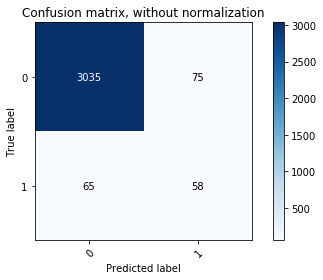

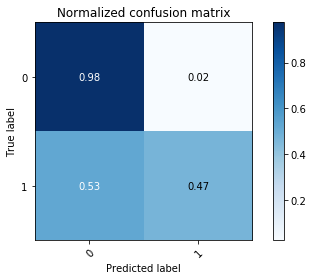

In [12]:
np.set_printoptions(precision=2)
class_names = [0, 1]#y_test.target_names
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test2, predicted2, classes=unique_labels(y_test2, predicted2), title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test2, predicted2, classes=unique_labels(y_test2, predicted2), normalize=True, title='Normalized confusion matrix')

plt.show()

In [13]:
print("Macro")
print("Precision Score",round(metrics.precision_score(y_test, predicted.round(),average='macro'), ndigits=5))
print("Recall Score",round(metrics.recall_score(y_test, predicted.round(),average='macro'), ndigits=5))
print("F1 Score",round(metrics.f1_score(y_test, predicted.round(),average='macro'), ndigits=5))


Macro
Precision Score 0.70756
Recall Score 0.72371
F1 Score 0.71529
